In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#字体设置
plt.rcParams['font.sans-serif'] = ['Times New Roman']

#### 数据预处理

In [113]:
df = pd.read_excel("data/boston.xlsx", index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [115]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [116]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

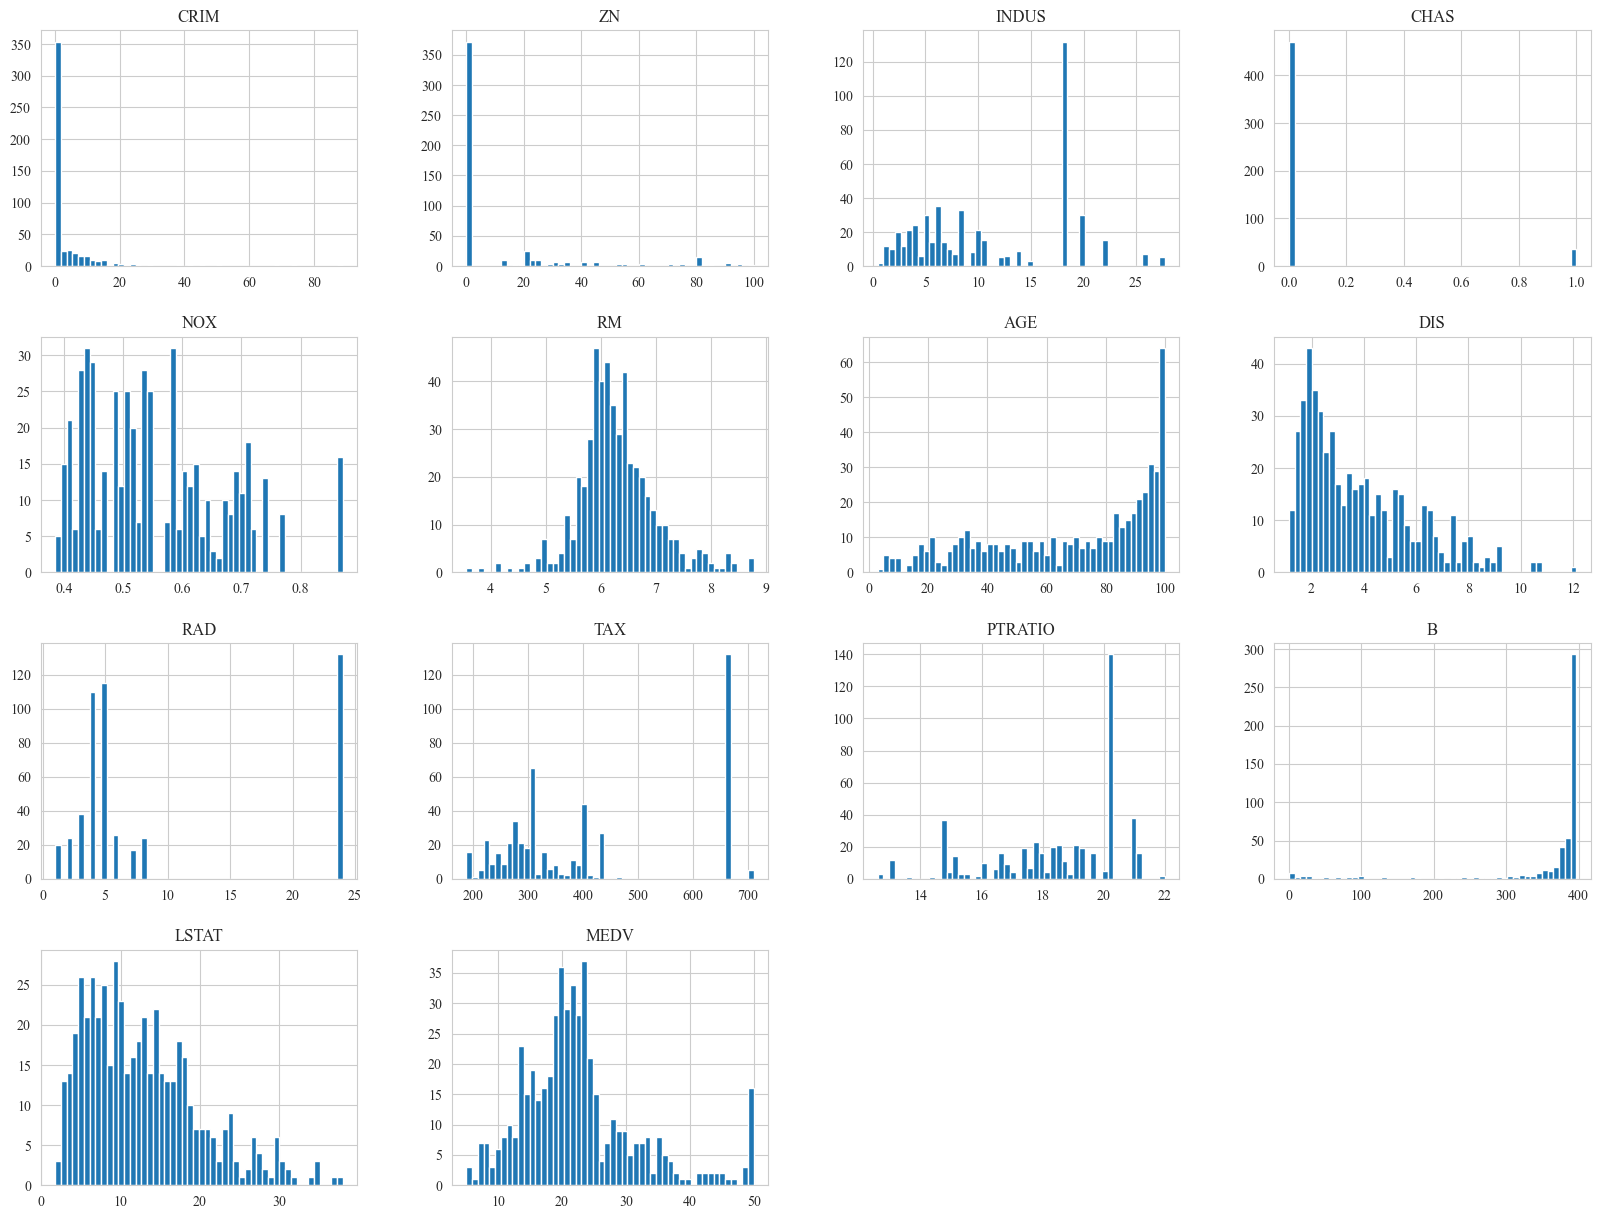

In [117]:
df.hist(bins=50, figsize=(20, 15))  #统计直方图
plt.show()

In [118]:
#计算与房价的相关性
corr_matrix = df.corr()
corr_matrix[df.columns[-1]].sort_values(ascending=False, key=abs)

MEDV       1.000000
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

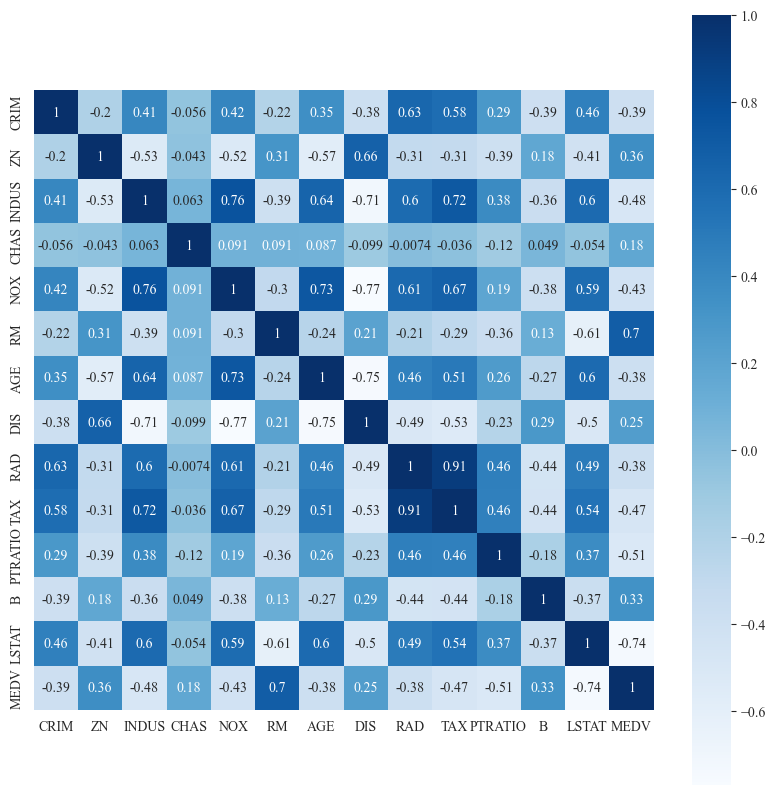

In [119]:
#相关性热力图绘制
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

In [120]:
# 确定最大特征所在列
max_column = "LSTAT"

#### 一元线性回归

In [121]:
#数据集处理
data = df[[max_column, df.columns[-1]]]
data.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [122]:
#划分训练集和测试集
train_data = df[[max_column, "MEDV"]]

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)
train_set = (train_set - np.mean(train_set, axis=0)) / np.std(train_set, axis=0)
test_set = (test_set - np.mean(test_set, axis=0)) / np.std(test_set, axis=0)

x_train = train_set[max_column].values.reshape(-1, 1)
y_train = train_set["MEDV"].values.reshape(-1, 1)
x_test = test_set[max_column].values.reshape(-1, 1)
y_test = test_set["MEDV"].values.reshape(-1, 1)


In [123]:
cost_history = []
w_history = []
b_history = []

In [124]:
def cost_func(y,y_pred):
    m = len(y)
    return (1 / (2 * m)) * np.sum((y_pred - y) ** 2),y_pred-y
def gradient_descent(X, y, learning_rate, num_iterations):
    w=np.random.randn()
    b=np.random.randn()
    m = len(y)
    for i in range(num_iterations):
        # 计算预测值
        y_pred = w * X + b
        # 计算误差
        # 计算损失函数
        cost,error = cost_func(y,y_pred)
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)
        # 计算梯度
        gradient_w = (1 / m) * np.sum(error * X)
        gradient_b = (1 / m) * np.sum(error)

        # 更新参数
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b

    return w, b
def predict(x):
    return  w*x+b

In [125]:
w,b = gradient_descent(x_train,y_train,1e-2,1000)

In [126]:
#输出w,b
"Weight:", {w}, "Bias:", {b}

('Weight:', {-0.7363764845771774}, 'Bias:', {-3.485907820956125e-05})

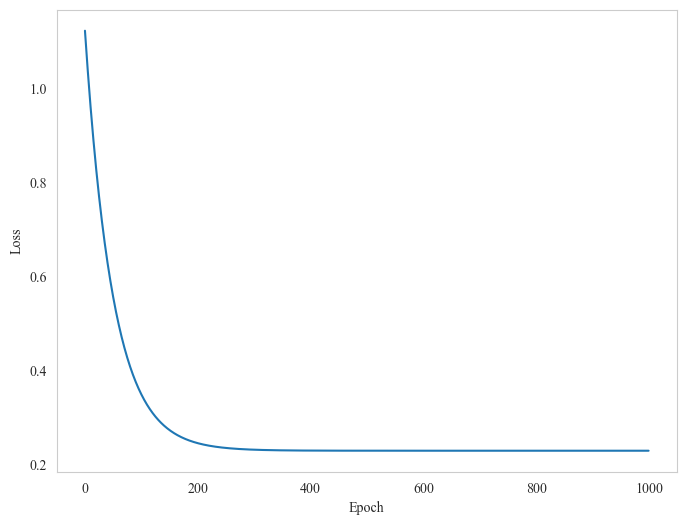

In [127]:
#绘制损失曲线图
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history)
#不显示网格
plt.grid(False)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [128]:
#预测
y_pred=predict(x_test)

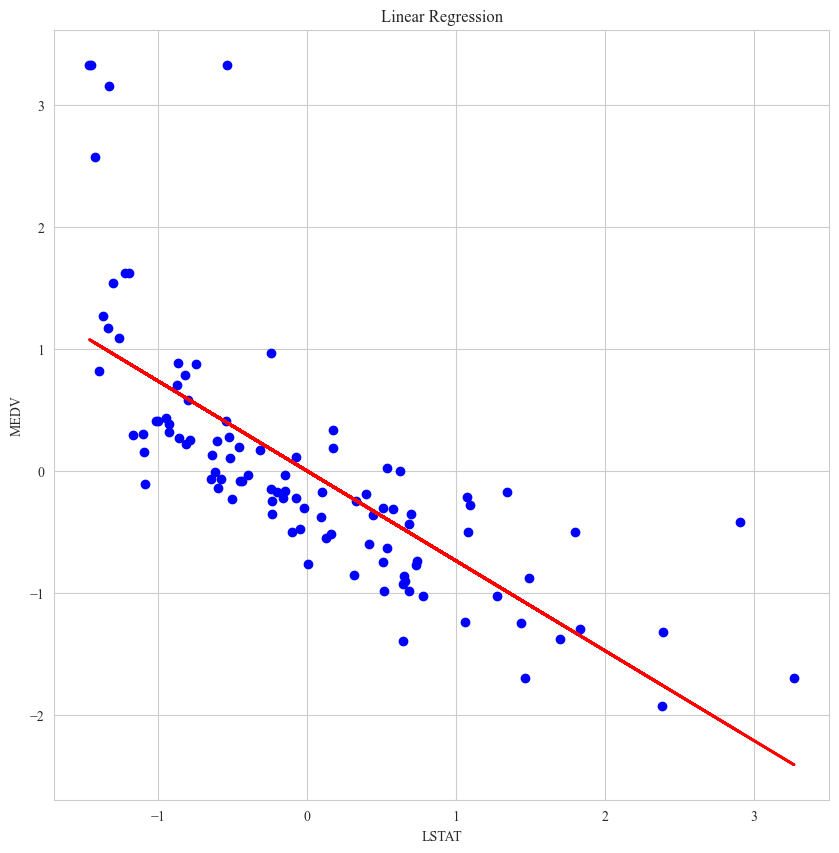

In [129]:
#绘图预测结果图
plt.figure(figsize=(10, 10))
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test, y_pred, color="red", linewidth=2)
plt.xlabel(max_column)
plt.ylabel("MEDV")
plt.title("Linear Regression")
plt.show()

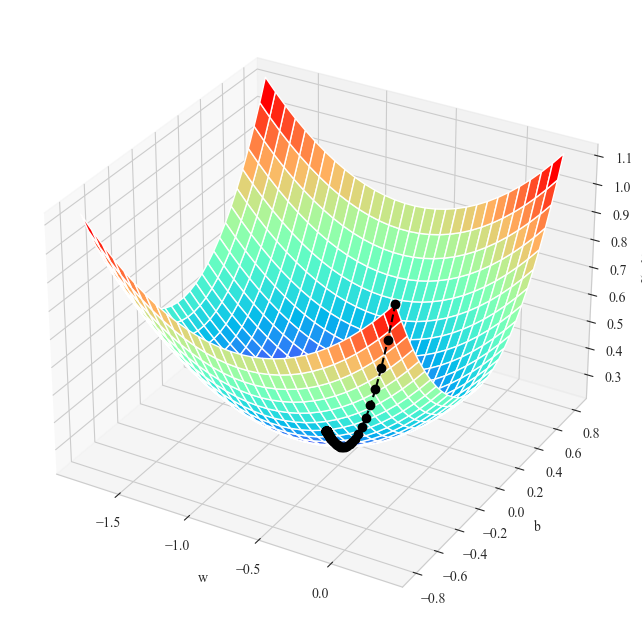

In [132]:
#w,b,loss 三维关系图
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='3d')
w_range = (max(w_history) - min(w_history)) 
b_range = (max(b_history) - min(b_history))
w_data = np.linspace(w - w_range, w + w_range, 30)
b_data = np.linspace(b - b_range, b + b_range, 30)
w_grid, b_grid = np.meshgrid(w_data, b_data)
j_grid = np.zeros((len(w_data), len(b_data)))
m=len(x_train)

for i,w_ in enumerate(w_data):
    for j,b_ in enumerate(b_data):
        j_grid[i,j] = cost_func(y_train,w_*x_train+b_)[0]
ax.plot_surface(w_grid, b_grid, j_grid, cmap='rainbow')
ax.plot(w_history[::10], b_history[::10], cost_history[::10], color='black', marker='o', linestyle='dashed')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')
plt.show()

Text(0.5, 0, 'w')

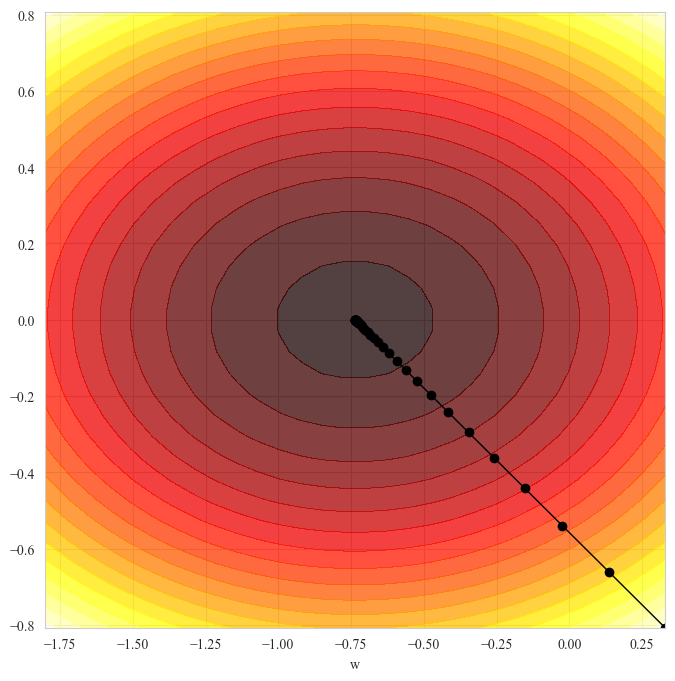

In [133]:
#绘制等高线图
plt.figure(figsize=(8, 8))
plt.contourf(w_grid, b_grid, j_grid, 20, alpha=0.75, cmap=plt.cm.hot)
plt.plot(w_history[::20], b_history[::20], color='black', marker='o',linewidth=1)
plt.xlabel('w')